In [9]:
# packages
import pandas as pd # for data processing
import seaborn as sns # for visualisation 
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import os

current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Current Working Directory: /Users/ingridlewah/Desktop/Projects/MANGODEV/mangosplit/Netflix_project/dataset


In [4]:
netflix_data = pd.read_csv("dataset/cleaned_netflix_data.csv")

1. Netflix content release 
----

In [29]:
netflix_data_content = netflix_data.copy()

In [30]:
netflix_data_content['date_added'].value_counts()

date_added
January 1, 2020       119
November 1, 2019       89
March 1, 2018          75
December 31, 2019      74
October 1, 2018        71
                     ... 
February 19, 2016       1
January 23, 2016        1
January 22, 2016        1
January 8, 2016         1
September 25, 2021      1
Name: count, Length: 1767, dtype: int64

In [31]:
# Convert 'date_added' to datetime objects
netflix_data_content['date_added'] = pd.to_datetime(netflix_data_content['date_added'], errors='coerce')

# Extract the year from the 'date_added' column
netflix_data_content['year_added'] = netflix_data_content['date_added'].dt.year

# Count the number of titles added in each year
yearly_counts = netflix_data_content['year_added'].value_counts()

# Sort the counts by year
yearly_counts = yearly_counts.sort_index()

# Display the counts per year
print(yearly_counts)

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1888
2021.0    1498
Name: count, dtype: int64


In [32]:

# Convert 'date_added' to datetime
netflix_data_content['date_added'] = pd.to_datetime(netflix_data_content['date_added'], errors='coerce')

# Extract the year from the 'date_added' column
netflix_data_content['year_added'] = netflix_data_content['date_added'].dt.year

# Count the number of titles added in each year and categorize them by 'type'
yearly_counts = netflix_data_content.groupby(['year_added', 'type']).size().unstack(fill_value=0)

# Display the counts per year, categorized as "TV" and "Movies"
print(yearly_counts)

type        Movie  TV Show
year_added                
2008.0          1        1
2009.0          2        0
2010.0          1        0
2011.0         13        0
2012.0          3        0
2013.0          6        4
2014.0         19        4
2015.0         56       17
2016.0        253      165
2017.0        839      325
2018.0       1237      388
2019.0       1424      575
2020.0       1284      604
2021.0        993      505


2. Content Preferences on Netflix: Movies vs. TV Shows

    What is the content release at netflix like ?
-----

In [11]:
# creating a copy of dataset so that will not affect our original dataset.
netflix_df = netflix_data.copy()

In [12]:
netflix_df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

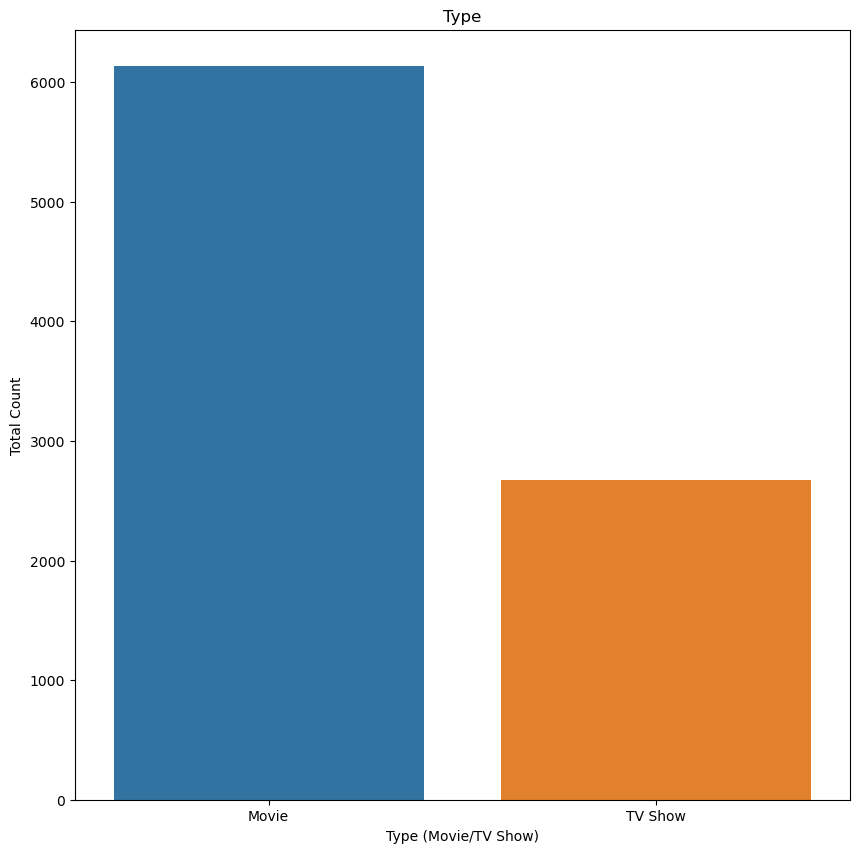

In [19]:
netflix_data_hist = netflix_df['type'].value_counts()

netflix_data_hist_df = pd.DataFrame({'type': netflix_data_hist.index, 'count': netflix_data_hist.values})

plt.figure(figsize=(10, 10))
sns.barplot(x='type', y='count', data=netflix_data_hist_df)
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.title('Type')
plt.show()

(-1.23464994868042,
 1.2346504795506437,
 -1.1953617900438445,
 1.1953632179088005)

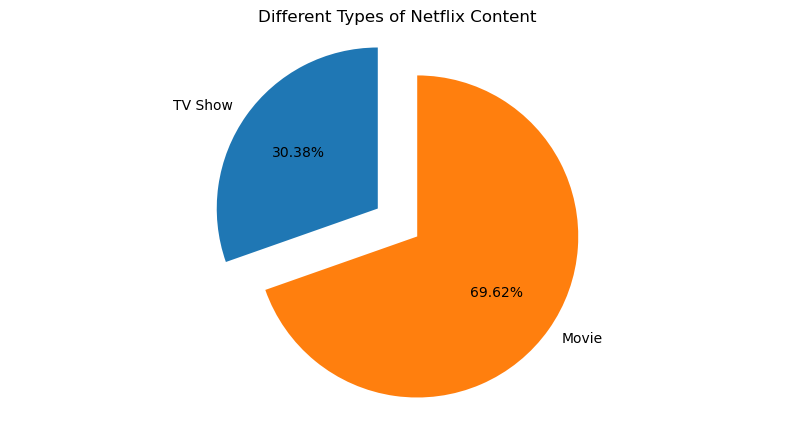

In [27]:
# PIE CHART
plt.figure(figsize=(10,5))
label=['TV Show', 'Movie']
plt.pie(netflix_df['type'].value_counts().sort_values(), 
        labels=label, 
        explode=[0.15,0.15], 
        autopct='%1.2f%%', startangle=90)
plt.title('Different Types of Netflix Content')
plt.axis('equal')

3. Netflix visualisation of the rating of shows and movies
------

In [21]:
netflix_df['rating'].value_counts()

rating
TV-MA       3211
TV-14       2161
TV-PG        862
R            799
PG-13        491
TV-Y7        334
TV-Y         307
PG           289
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

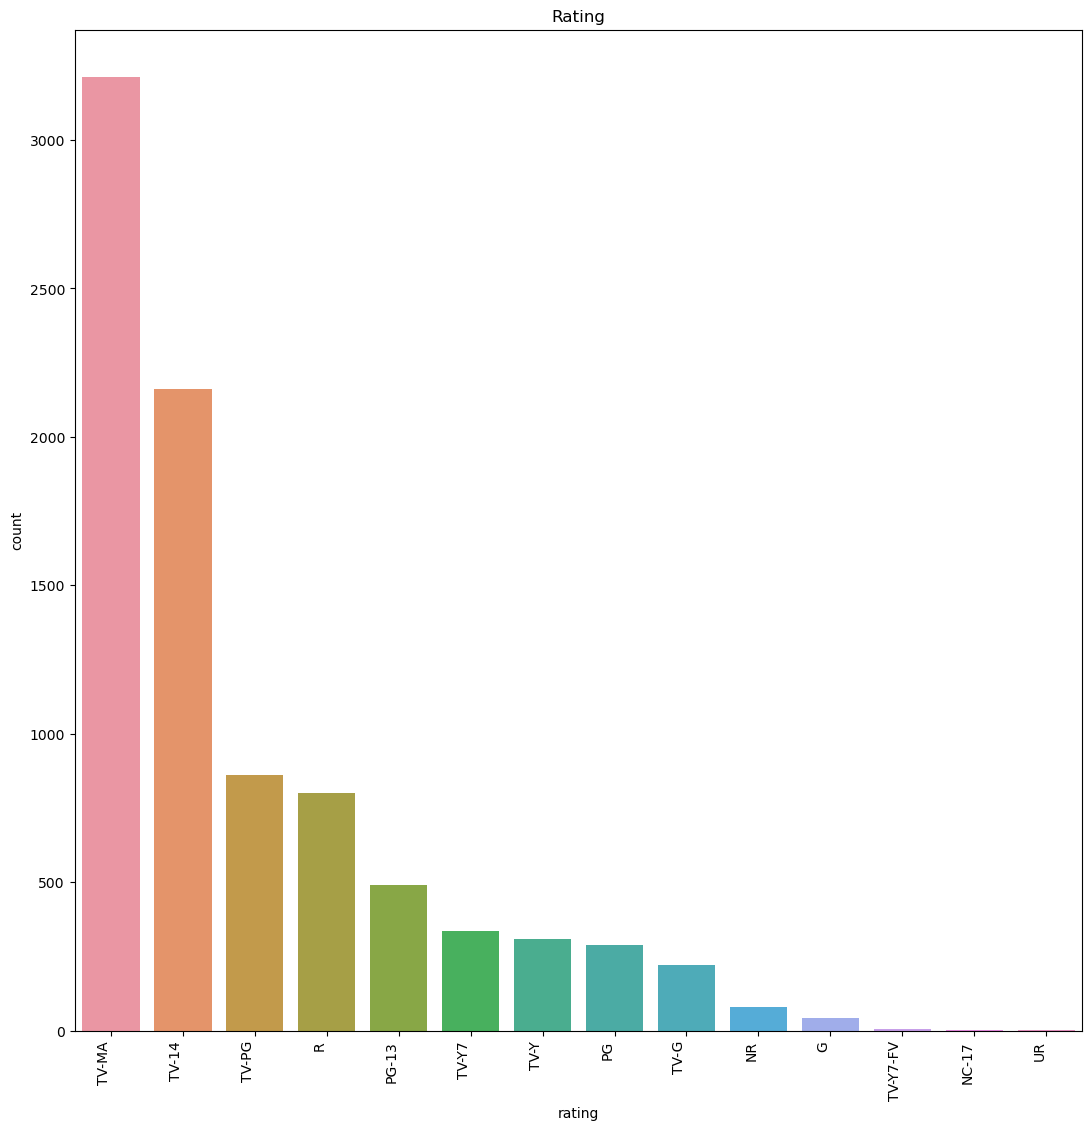

In [23]:
# Create a count plot for the 'rating' column
plt.figure(figsize=(13, 13))
sns.countplot(data=netflix_df, x='rating', order=netflix_df['rating'].value_counts().index)
plt.title('Rating')
plt.xticks(rotation=90, ha="right")

plt.show()